In [1]:
import pandas as pd

vetvisitLog = pd.read_csv('BMPMammalOnlyKeeperLog.csv')

vetvisitLog.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Feeding Log,Did you feed all individuals?,"If not, who did you feed?",What did you feed? (Weight per animal) [<0.1 lb],...,Did you sedate?,Vet Log,Type.2,Vet name,Type.3,Location,Notes.1,Reminders,Reminder Date,Reminder/Note
0,12/1/2024 10:43,Red Fox,Jake,Feeding/Observation,12/1/2024,10:30:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/1/2024 10:45,Wolf,Jake,Habitat Cleaning/Observation,12/1/2024,10:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/1/2024 10:43,Bobcat,Jake,Feeding/Observation,12/1/2024,9:00:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/30/2024 16:31,Bobcat,Jake,Feeding/Observation,11/30/2024,4:45:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/30/2024 16:32,Red Fox,Jake,Feeding/Observation,11/30/2024,4:30:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
vetvisitLog = vetvisitLog[vetvisitLog['Log Type'] == "Medical"]

In [9]:
vetvisit_cols = ['Timestamp','Animal','Staff','Log Type','Date','Time','Animal Name','Encounter Type','Vet name','Type.3','Location','Notes.1']

vetvisit_df = vetvisitLog[vetvisit_cols]

vetvisit_df = vetvisit_df[vetvisit_df['Encounter Type'] == 'Vet Visit']

vetvisit_df.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Animal Name,Encounter Type,Vet name,Type.3,Location,Notes.1
642,8/3/2024 12:14,Bobcat,Miranda,Medical,7/31/2024,12:00:00 PM,Cash and carter,Vet Visit,Sara Anderson,Quarterly,On-Site,Cash was exhibiting open mouth breathing witho...
643,8/3/2024 12:19,Red Fox,Miranda,Medical,7/31/2024,11:35:00 AM,Jamie and Sabra,Vet Visit,Sara Anderson,Quarterly,On-Site,Discussed jamie balding and both have some pat...
644,8/3/2024 12:18,Wolf,Miranda,Medical,7/31/2024,11:00:00 AM,"Winema, Ela, Ahuli, Bodaway, Yonah",Vet Visit,Sarah Anderson,Quarterly,On-Site,Assessed current mobility issues further devel...
1353,4/16/2024 14:47,Wolf,Krystal,Medical,4/16/2024,12:30:00 PM,Winema,Vet Visit,Sara Anderson,Injury check,On-Site,Watched winema. Perscribed meloxicam for a wee...
2500,12/8/2023 15:08,Red Fox,Krystal,Medical,12/8/2023,1:43:00 PM,Sabra,Vet Visit,Sara Anderson,Yearly assessments,On-Site,"Satisfactory, 12.4 pounds"


In [11]:
vetvisit_df.isna().sum()

Timestamp         0
Animal            0
Staff             0
Log Type          0
Date              0
Time              0
Animal Name       0
Encounter Type    0
Vet name          0
Type.3            0
Location          0
Notes.1           0
dtype: int64

In [13]:
vetvisit_df['Type.3'].unique()

array(['Quarterly', 'Injury check', 'Yearly assessments',
       'Yearly assessment ', 'Yearly Assessment', 'Yearly Assessment ',
       'Fecal exam ', 'Fecal check '], dtype=object)

In [15]:
# Define the mapping dictionary
value_mapping = {
    'Quarterly': 'Quarterly',
    'Injury check': 'Injury check',
    'Yearly assessments': 'Yearly assessments',
    'Yearly assessment ': 'Yearly assessments',
    'Yearly Assessment': 'Yearly assessments',
    'Yearly Assessment ': 'Yearly assessments',
    'Fecal check ': 'Fecal check',
    'Fecal exam ': 'Fecal check'
}

vetvisit_df['Type.3'] = vetvisit_df['Type.3'].replace(value_mapping)

print(vetvisit_df['Type.3'].unique())

['Quarterly' 'Injury check' 'Yearly assessments' 'Fecal check']


In [17]:
vetvisit_df.to_csv('VetVisitLog.csv', index=False)

In [23]:
value_mapping_1 = {'Sarah Anderson ': 'Sara Anderson '}

vetvisit_df['Vet name'] = vetvisit_df['Vet name'].replace(value_mapping_1)

print(vetvisit_df['Vet name'].unique())

['Sara Anderson']


### Visualization of Vet Visit

C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_75928\1594205150.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Animal', order=df['Animal'].value_counts().index, palette='viridis')


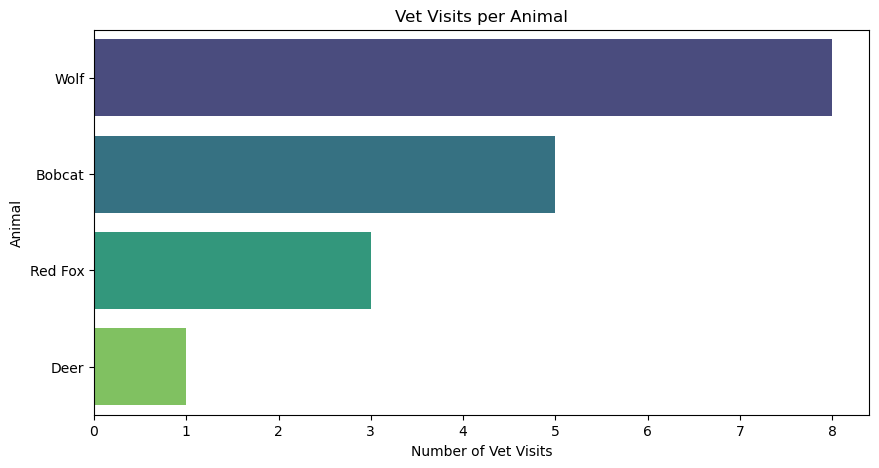

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

df = vetvisit_df.copy()

#Vet Visits per Animal

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Animal', order=df['Animal'].value_counts().index, palette='viridis')
plt.xlabel("Number of Vet Visits")
plt.ylabel("Animal")
plt.title("Vet Visits per Animal")
plt.show()

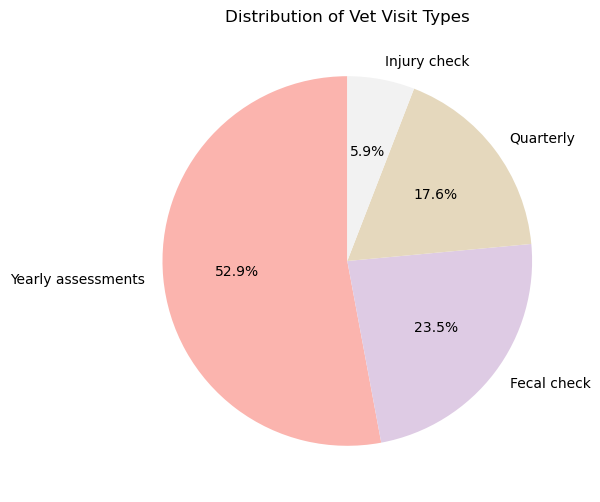

In [33]:
# Vet Visit Types

plt.figure(figsize=(6, 6))
df['Type.3'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Pastel1', startangle=90)
plt.ylabel("")
plt.title("Distribution of Vet Visit Types")
plt.show()

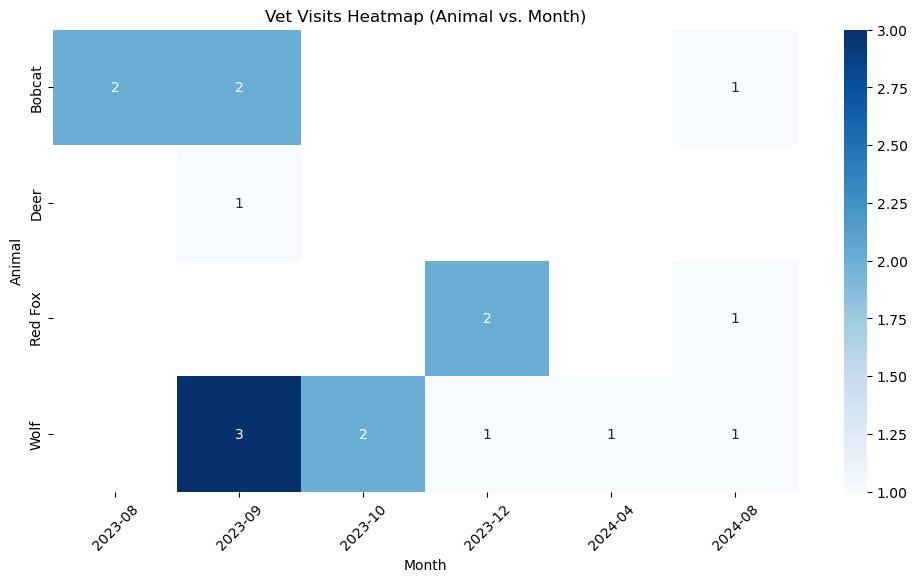

In [43]:
# Time Series of Vet Visits

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract Year-Month for grouping
df['Year-Month'] = df['Timestamp'].dt.to_period('M')

# Create pivot table for heatmap
heatmap_data = df.pivot_table(index='Animal', columns='Year-Month', values='Timestamp', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f")
plt.title("Vet Visits Heatmap (Animal vs. Month)")
plt.ylabel("Animal")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

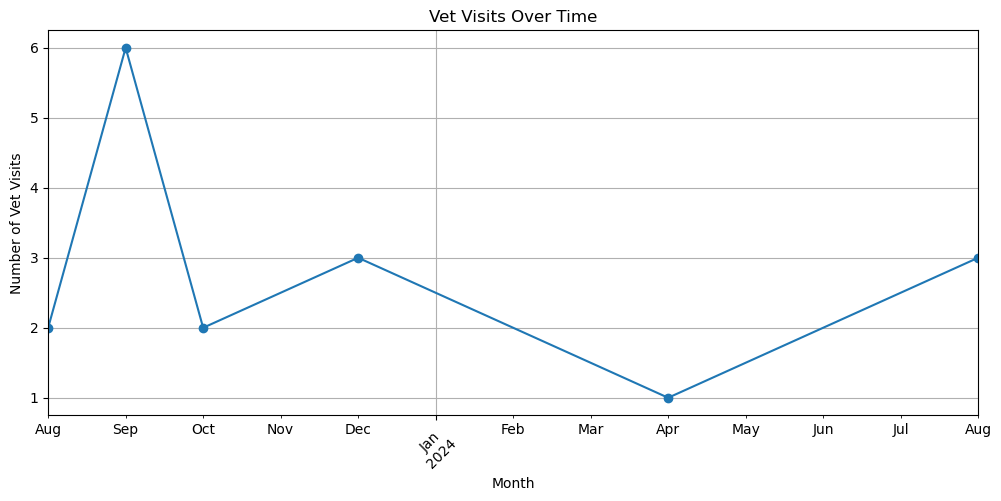

In [45]:
#df['Month'] = df['Date'].dt.to_period('M')  # Group by month
visits_per_month = df.groupby('Year-Month').size()

plt.figure(figsize=(12, 5))
visits_per_month.plot(marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Number of Vet Visits")
plt.title("Vet Visits Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()
